分别设计一个高斯低通、高通、高频提升、以及陷波滤波器，显示这些滤波器的二维强度图像，同时
显示这些滤波器的三维曲面图。 

In [7]:
#!/usr/bin/python3 
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from PIL import ImageOps

In [8]:
root_path = '/root/DIVP_project/'
einstein_path = "project02/proj02-images/einstein_orig.tif"
baboon_path = "project02/proj02-images/baboon.jpg"

In [9]:
# 分别设计一个高斯低通、高通、高频提升以及陷波滤波器，显示这些滤波器的二维强度图像，同时显示这些滤波器的三维曲面图

# 高斯低通滤波器
def gaussian_low_pass_filter(size, sigma):
    filter = np.zeros((size, size))
    for i in range(size):
        for j in range(size):
            filter[i][j] = np.exp(-((i - size // 2) ** 2 + (j - size // 2) ** 2) / (2 * sigma ** 2))
    return filter

# 高斯高通滤波器
def gaussian_high_pass_filter(size, sigma):
    filter = np.zeros((size, size))
    for i in range(size):
        for j in range(size):
            filter[i][j] = 1 - np.exp(-((i - size // 2) ** 2 + (j - size // 2) ** 2) / (2 * sigma ** 2))
    return filter

# 高频提升滤波器
def high_frequency_boost_filter(size, sigma, A):
    filter = np.zeros((size, size))
    for i in range(size):
        for j in range(size):
            filter[i][j] = 1 + A * (1 - np.exp(-((i - size // 2) ** 2 + (j - size // 2) ** 2) / (2 * sigma ** 2)))
    return filter

# 陷波滤波器
def notch_filter(size, sigma, D0, u0, v0):
    filter = np.zeros((size, size))
    for i in range(size):
        for j in range(size):
            filter[i][j] = 1 - np.exp(-((i - u0) ** 2 + (j - v0) ** 2) / (2 * sigma ** 2)) - np.exp(-((i - size + u0) ** 2 + (j - size + v0) ** 2) / (2 * sigma ** 2))
    return filter


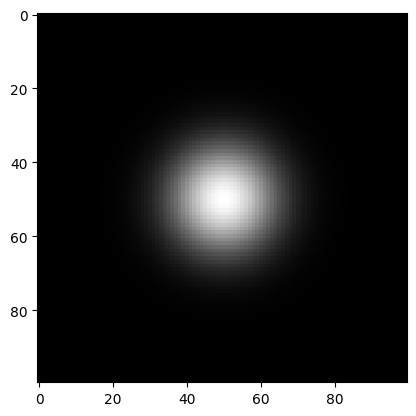

In [10]:
# 设计一个size为100，sigma为10的高斯低通滤波器，显示这个滤波器的二维强度图像，同时显示这个滤波器的三维曲面图
size = 100
sigma = 10
filter = gaussian_low_pass_filter(size, sigma)
plt.imshow(filter, cmap='gray')
plt.show()

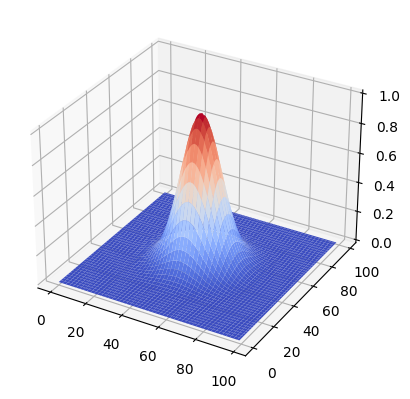

In [11]:
# 显示三维曲面图
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.arange(size)
y = np.arange(size)
x, y = np.meshgrid(x, y)
ax.plot_surface(x, y, filter, cmap='coolwarm')
plt.show()


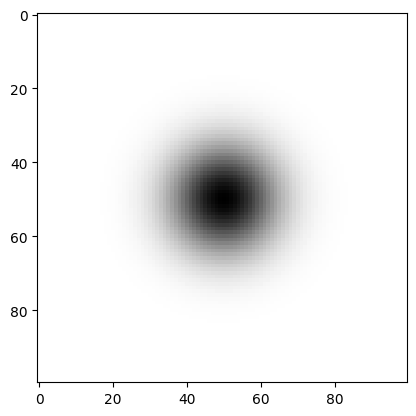

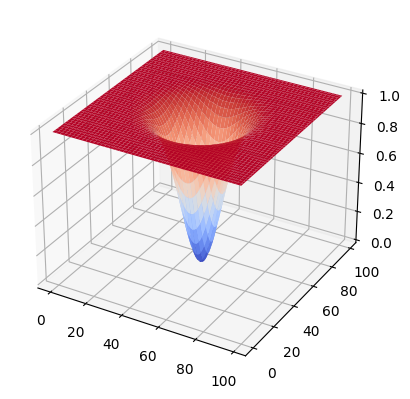

In [16]:
# 设计一个size为100，sigma为10的高斯高通滤波器，显示这个滤波器的二维强度图像，同时显示这个滤波器的三维曲面图
filter_high_pass = gaussian_high_pass_filter(size, sigma)
plt.imshow(filter_high_pass, cmap='gray')
plt.show()

# 显示三维曲面图
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.arange(size)
y = np.arange(size)
x, y = np.meshgrid(x, y)
ax.plot_surface(x, y, filter_high_pass, cmap='coolwarm')
plt.show()

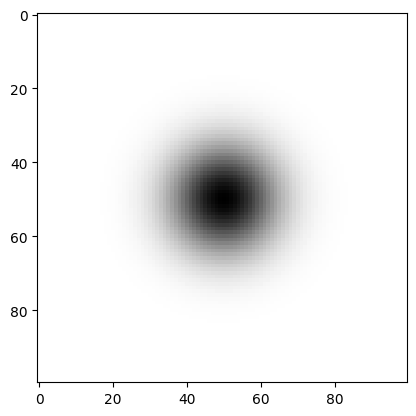

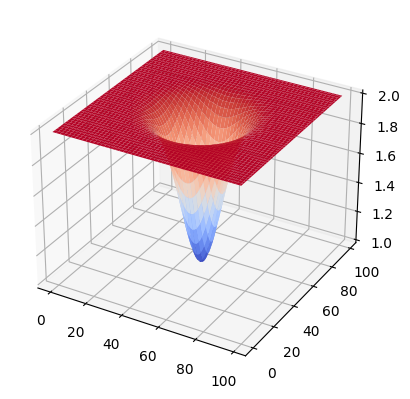

In [18]:
# 设计一个size为100，sigma为10的高频提升滤波器，显示这个滤波器的二维强度图像，同时显示这个滤波器的三维曲面图
filter_high_frequency_boost = high_frequency_boost_filter(size, sigma, 1)
plt.imshow(filter_high_frequency_boost, cmap='gray')
plt.show()

# 显示三维曲面图
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.arange(size)
y = np.arange(size)
x, y = np.meshgrid(x, y)
ax.plot_surface(x, y, filter_high_frequency_boost, cmap='coolwarm')
plt.show()


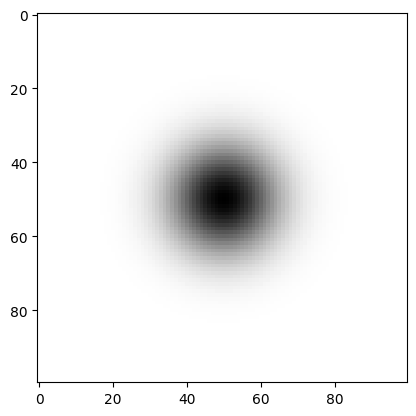

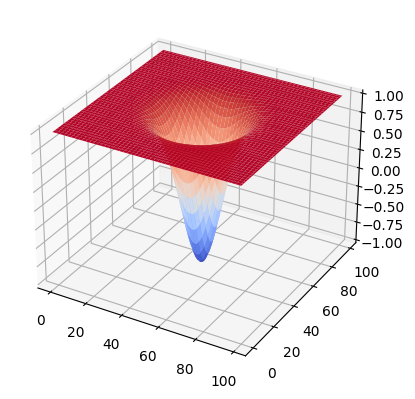

In [19]:
# 设计一个size为100，sigma为10，D0为10，u0为50，v0为50的陷波滤波器，显示这个滤波器的二维强度图像，同时显示这个滤波器的三维曲面图
D0 = 10
u0 = 50
v0 = 50
filter_notch = notch_filter(size, sigma, D0, u0, v0)
plt.imshow(filter_notch, cmap='gray')
plt.show()

# 显示三维曲面图
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.arange(size)
y = np.arange(size)
x, y = np.meshgrid(x, y)
ax.plot_surface(x, y, filter_notch, cmap='coolwarm')
plt.show()